In [21]:
#import delle librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Esercizio2.1

Vogliamo calcolare numericamente via metodo Monte Carlo il seguente integrale:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx =\int_0^1 f(x) dx= 1$$

Il metodo che seguiamo è quindi riscrivere l'integrale come:

$$\int_0^1 f(x) p(x) dx$$

e pertanto si pone il problema di scegliere una determinata $p(x)$. Dapprima usiamo una distribuzione uniforme $[0,1]$ ($\textit{uniform sampling}$), successivamente ripetiamo il calcolo usando l'$\textit{importance sampling}$, ovvero usando una distribuzione di probabilità non uniforme sempre nello stesso intervallo. 

La scelta della probabilità chiaramente influisce sulla bontà dell'algoritmo e in maniera non indifferente. La scelta pertanto si richiede che cada nell'ambito di una funzione che, oltre ad essere positiva e normalizzata, deve essere similare alla funzione da integrare. Per quanto il concetto di simile alla funzione integranda possa sembrare di difficile definizione pratica, è utile spesso considerare lo sviluppo secondo Taylor dell'integranda. In questo caso però, la scelta è ricaduta su:

$$\hat{p}(x)= (1-x)$$
in quanto lo sviluppo secondo Taylor era di difficile inversione. L'integrale di questa funzione nell'intervallo considerato è $\frac{1}{2}$, pertando è necessario considerare:

$$p(x)= 2(1-x)$$

Integrando $p(x)$ e invertendo la funzione è possibile utilizzare il metodo della cumulativa inversa e trovare come estrarre $y$, per poi modificare di conseguenza l'integranda:

$$ f(x) \rightarrow \frac{f(y)}{p(y)}$$

per poi procedere a valutare l'integrale. In altre parole abbiamo estratto un numero $x$ uniformemente nell'intervallo per ottenere $y$ tramite la:

$$y = 1-\sqrt{1-x^2}$$

Ripetiamo la procedura con $M=10^4$ steps $x_i$ e l'integrale, poichè è nell'intervallo $[0,1]$ sarà dato da:
$$I=\frac{1}{M}\sum_i f(y_i)$$

In realtà spezziamo questi step in $N=100$ blocchi per ottenere altrettante stime dell'integrale: studiamo l'andamento dell'integrale e dell'errore su di esso in funzione del numero di blocchi.

In [22]:
N=100; #N è il numero di blocchi
x=range(N) # (1,2,..100)

Carichiamo i dati da file.
$\textbf{oss}$: come in precedenza dati ed errori relativi sono salvati sui file in blocco, uno dietro l'altro.


In [23]:
unif = np.loadtxt( 'uniform_integral.dat',max_rows=N ) #vettore di medie lungo N
err_unif= np.loadtxt( 'uniform_integral.dat',skiprows=N ) #errore sulle medie

nonunif = np.loadtxt( 'integral.dat',max_rows=N ) #vettore di medie lungo N
err_nonunif= np.loadtxt( 'integral.dat',skiprows=N ) #errore sulle medie

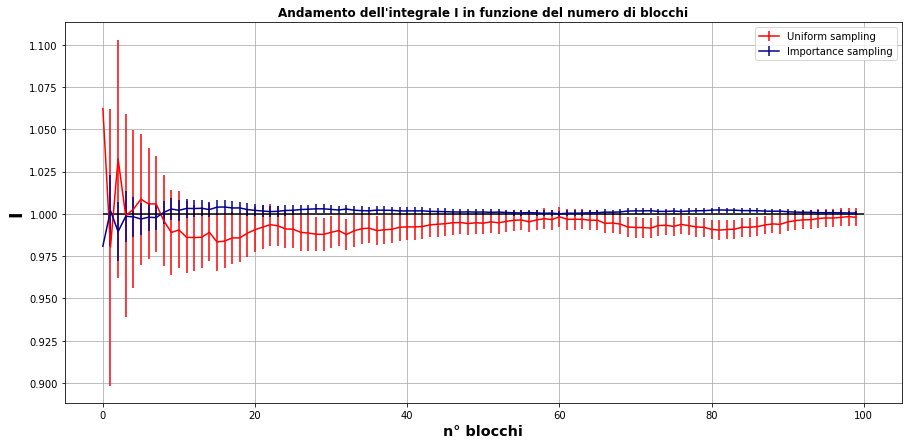

In [24]:

fig=plt.figure(figsize=(15, 7))
plt.errorbar(x,unif,yerr=err_unif,color="r",label="Uniform sampling")
plt.errorbar(x,nonunif,yerr=err_nonunif,color="darkblue", label="Importance sampling")
plt.hlines(1, 0, 100)
plt.xlabel('n° blocchi',weight="bold",size="x-large")
plt.ylabel('I',weight="bold",size="xx-large")
plt.title("Andamento dell'integrale I in funzione del numero di blocchi", weight="bold")
plt.legend()
plt.grid(True)
plt.show();

Come si può vedere chiaramente dal confronto tra i due metodi la scelta di $p(x)$ condiziona l'andamento dell'algoritmo, in particolare in questo caso l'integrazione fatta con l'importance sampling converge più velocemente al valore atteso.

# Esercizio 2.2

In questo esercizio vogliamo studiare la distanza percorsa da un oggetto che compie un cammino di Markov in due casi:
- reticolo cubico di lato $a=1$, ovvero l'oggetto compierà un passo lungo una delle sole tre direzioni possibili, quelle degli assi $x$,$y$,$z$
- nel continuo in 3 dimensioni, ovvero l'oggetto compierà un passo di lunghezza $a=1$ in una direzione qualsiasi, e ciò è realizzato estraendo uniformemente un angolo solido

Per verificare ciò, realizziamo un grafico per entrambe le situazioni con l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ per entrambe le situazioni, in funzione del numero di step che decidiamo di effettuare. In particolare, il numero degli step sarà contenuto in $[0,100]$.

Nel caso specifico del reticolo in 3 dimensioni, estraiamo un angolo solido uniforme per decidere il passo della catena, e da esso ricaviamo il movimento usando le coordinate sferiche.

Infine vogliamo verificare o meno se questo può essere considerato un moto diffusivo, ovvero se:

   $$\sqrt{\langle |\vec{r}_N|^2 \rangle} \approx K\sqrt{N}$$

Carichiamo i dati da file.

In [25]:
N=100
y, yerr = np.loadtxt( 'markov1',max_rows=N, unpack=True ) #vettore di medie lungo N
y2, y2err = np.loadtxt( 'markov2',max_rows=N, unpack=True ) #vettore di medie lungo N

Verifichiamo l'andamento della grandezza desiderata in funzione degli step della catena di Markov e la sua incertezza.

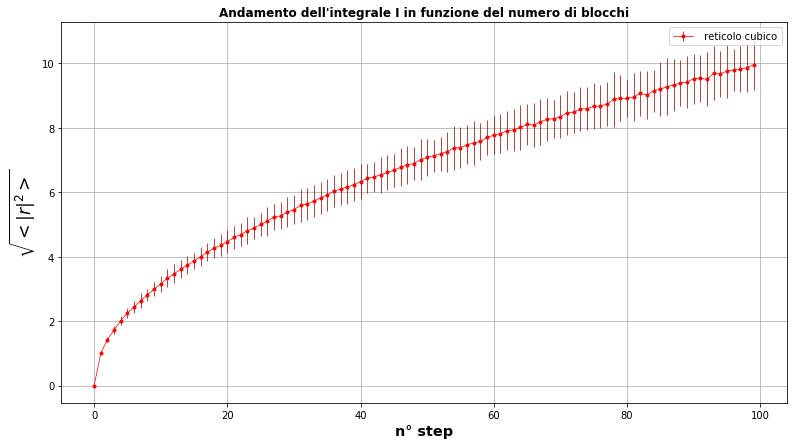

Costante di diffusione K=  0.9996884765864006


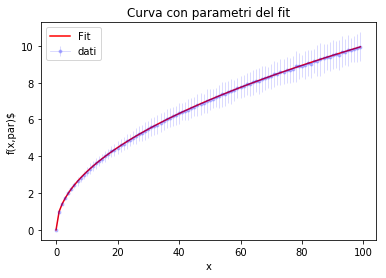

In [26]:
#devo definire la funzione da fittare
def f (N, k):
    return k * np.sqrt(N)

from scipy.optimize import curve_fit #fit curve 

fig=plt.figure(figsize=(13, 7))
plt.errorbar(x,y,yerr=yerr,marker=".",linewidth=0.7, color='r',ecolor = 'darkred',label=" reticolo cubico")
plt.xlabel('n° step',weight="bold",size="x-large")
plt.ylabel('$\sqrt{<|r|^2>}$',weight="bold",size="xx-large")
plt.title("Andamento dell'integrale I in funzione del numero di blocchi", weight="bold")
plt.legend()
plt.grid(True)
plt.show();

#fitting
par, a = curve_fit(f, x, y)
plt.title("Curva con parametri del fit")
plt.xlabel('x')
plt.ylabel('f(x,par)$')
plt.plot(x,f(x,*par), color='red', label='Fit')
plt.errorbar(x,y,yerr=yerr,marker=".",linewidth=0.7, color='blue',ecolor = 'blue',alpha=0.2,label="dati")
plt.legend()
print('Costante di diffusione K= ',par[0])

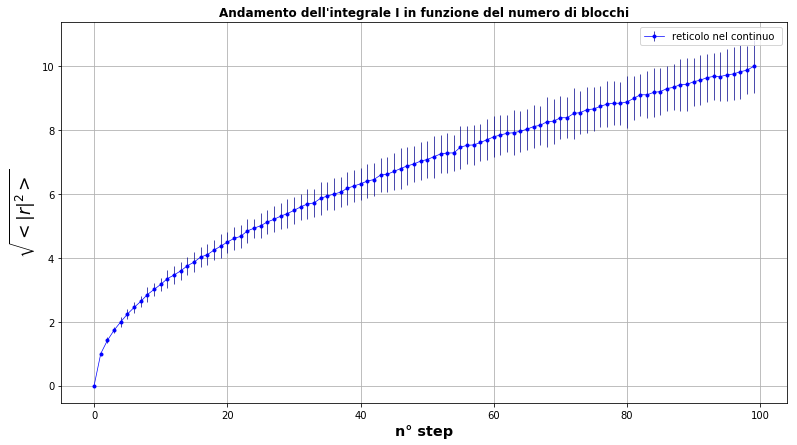

Costante di diffusione K=  1.000300173122873


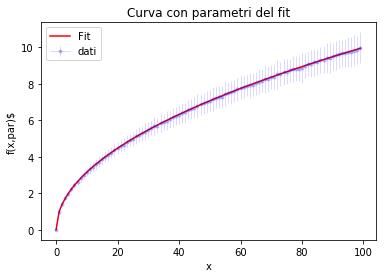

In [27]:
fig=plt.figure(figsize=(13, 7))
plt.errorbar(x,y2,yerr=y2err, marker=".",linewidth=0.7, color='blue',ecolor = 'darkblue', label="reticolo nel continuo ")
plt.xlabel('n° step',weight="bold",size="x-large")
plt.ylabel('$\sqrt{<|r|^2>}$',weight="bold",size="xx-large")
plt.title("Andamento dell'integrale I in funzione del numero di blocchi", weight="bold")
plt.legend()
plt.grid(True)
plt.show();

#fitting
par, a = curve_fit(f, x, y2)
plt.title("Curva con parametri del fit")
plt.xlabel('x')
plt.ylabel('f(x,par)$')
plt.plot(x,f(x,*par), color='red', label='Fit')
plt.errorbar(x,y2,yerr=y2err,marker=".",linewidth=0.7, color='blue',ecolor = 'blue',alpha=0.2,label="dati")
plt.legend()
print('Costante di diffusione K= ',par[0])

Si può quindi affermare che l'andamento della catena di Markov può in entrambi i casi essere paragonato a un moto diffusivo con $K \approx 1$

A margine un'ultima osservazione: è scorretto pensare che estrarre uniformemente nei loro intervalli standard $\theta$ e $\phi$ possa portare a una distribuzione uniforme degli angoli solidi derivanti. Questa scelta, per quanto apparentemente logica, porta infatti ad avere più punti attorni ai poli.

L'angolo solido è infatti dato dalla:
$$d\Omega= \sin(\theta)d\theta d\phi$$
pertanto per estrarre $\theta$ devo tenere conto del fatto che compare una funzione seno e utilizzare il già citato metodo della cumulativa inversa.